In [1]:
%matplotlib notebook

import os
import functools

#import cv2
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from tests.metaworld.envs.mujoco.sawyer_xyz.test_scripted_policies import ALL_ENVS, test_cases_latest_nonoise


/usr/local/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
def trajectory_generator(env, policy, act_noise_pct, res=(640, 480), camera='corner'):
    action_space_ptp = env.action_space.high - env.action_space.low

    env.reset()
    env.reset_model()
    o = env.reset()
    
    state_trajectory = []

    for _ in range(env.max_path_length):
        a = policy.get_action(o)
        a = np.random.normal(a, act_noise_pct * action_space_ptp)

        o, r, done, info = env.step(a)
        # Camera is one of ['corner', 'topview', 'behindGripper', 'gripperPOV']
        state_trajectory.append(o)
        #yield r, done, info, env.sim.render(*res, mode='offscreen', camera_name=camera)[:,:,::-1]
    return np.array(state_trajectory)

#def writer_for(tag, fps, res):
#    if not os.path.exists('movies'):
#        os.mkdir('movies')
#    return cv2.VideoWriter(
#        f'movies/{tag}.avi',
#        cv2.VideoWriter_fourcc('M','J','P','G'),
#        fps,
#        res
#    )

In [9]:
resolution = (1920, 1080)
camera = 'behindGripper' # one of ['corner', 'topview', 'behindGripper', 'gripperPOV']
flip=True # if True, flips output image 180 degrees

config = [
    # env, action noise pct, cycles, quit on success
    ('assembly-v2', np.zeros(4), 3, True),
    ('basketball-v2', np.zeros(4), 3, True),
    ('bin-picking-v2', np.zeros(4), 3, True),
    ('box-close-v2', np.zeros(4), 3, True),
    ('button-press-topdown-v2', np.zeros(4), 3, True),
    ('button-press-topdown-wall-v2', np.zeros(4), 3, True),
    ('button-press-v2', np.zeros(4), 3, True),
    ('button-press-wall-v2', np.zeros(4), 3, True),
    ('coffee-button-v2', np.zeros(4), 3, True),
    ('coffee-pull-v2', np.zeros(4), 3, True),
]

all_trajs = []

for env, noise, cycles, quit_on_success in config:
    tag = env + '-noise-' + np.array2string(noise, precision=2, separator=',', suppress_small=True)

    policy = functools.reduce(lambda a,b : a if a[0] == env else b, test_cases_latest_nonoise)[1]
    env = ALL_ENVS[env]()
    env._partially_observable = False
    env._freeze_rand_vec = False
    env._set_task_called = True
    
    trajs = [trajectory_generator(env, policy, noise, resolution, camera)]
    trajs.append(trajectory_generator(env, policy, noise, resolution, camera))
    trajs.append(trajectory_generator(env, policy, noise, resolution, camera))
    
    all_trajs.append(trajs)


<IPython.core.display.Javascript object>


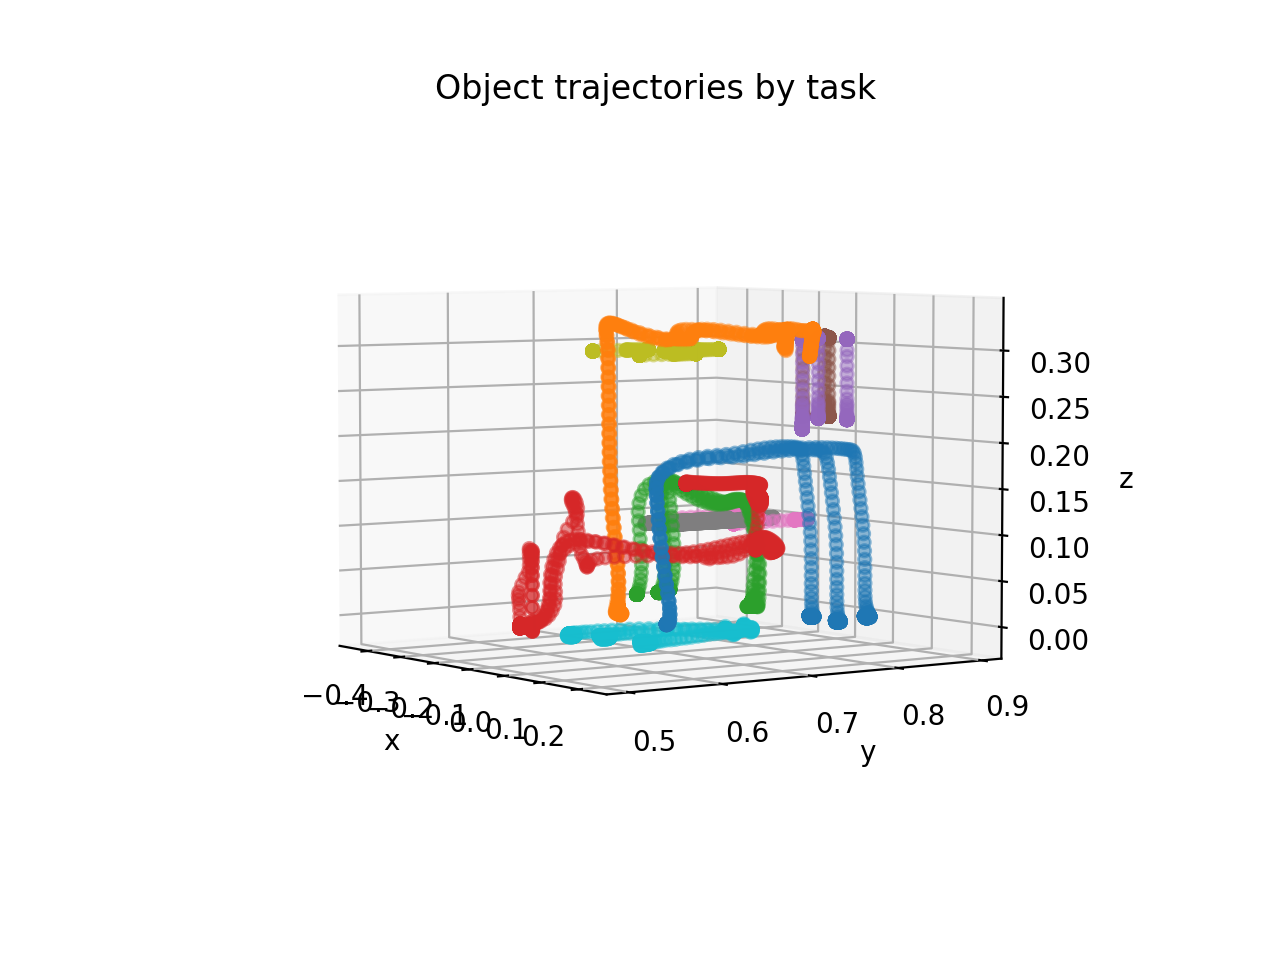

Text(0.5, 0.92, 'Object trajectories by task')

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i in range(len(all_trajs)):
    trajs = all_trajs[i]
    for traj in trajs:
        ax.scatter(traj[:,4], traj[:,5], traj[:,6], c=colors[i], alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title('Object trajectories by task')


<IPython.core.display.Javascript object>


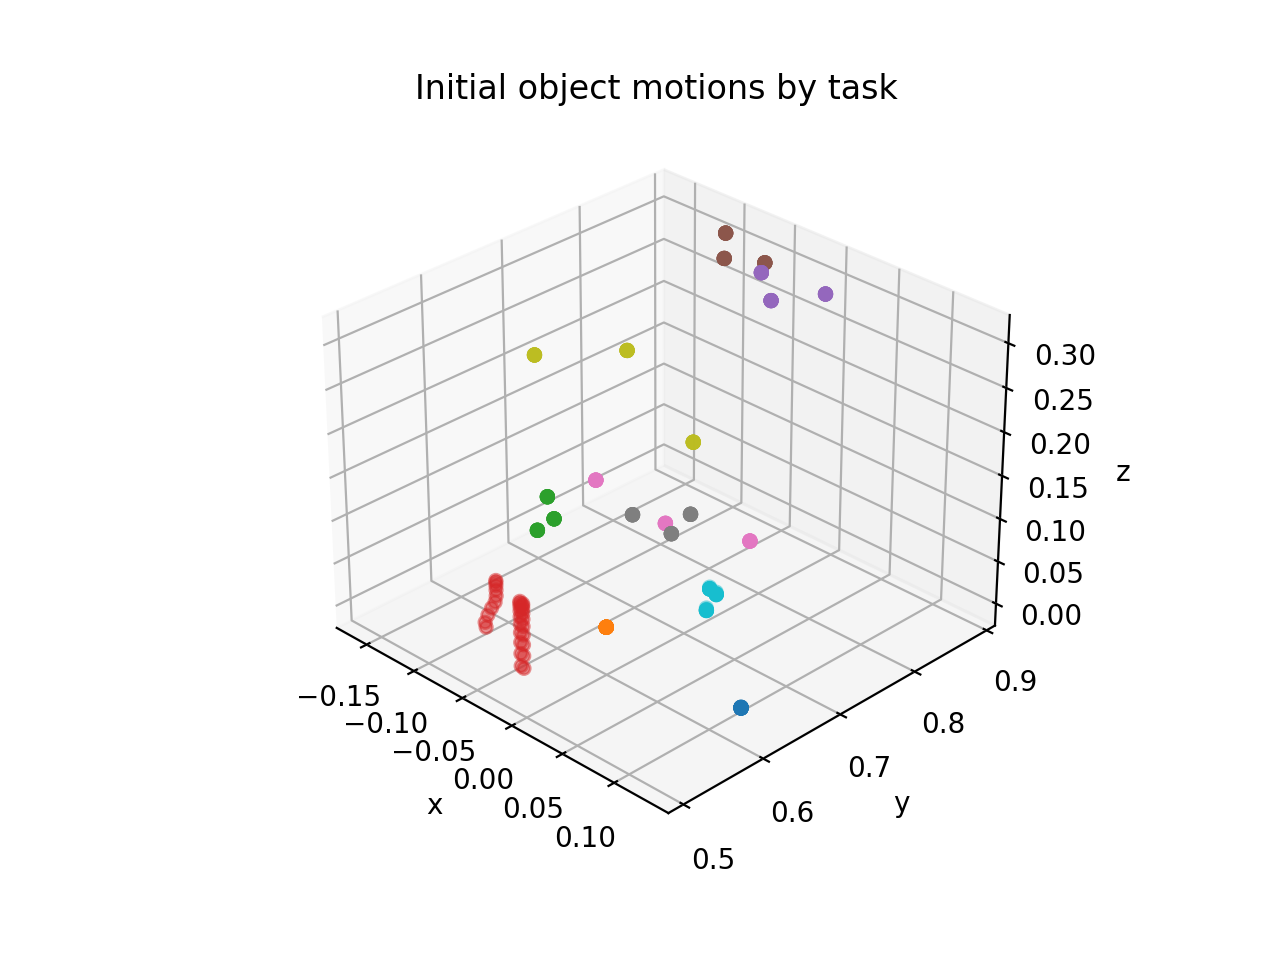

Text(0.5, 0.92, 'Initial object motions by task')

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i in range(len(all_trajs)):
    trajs = all_trajs[i]
    for traj in trajs:
        ax.scatter(traj[0:10,4], traj[0:10,5], traj[0:10,6], c=colors[i], alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title('Initial object motions by task')

<IPython.core.display.Javascript object>


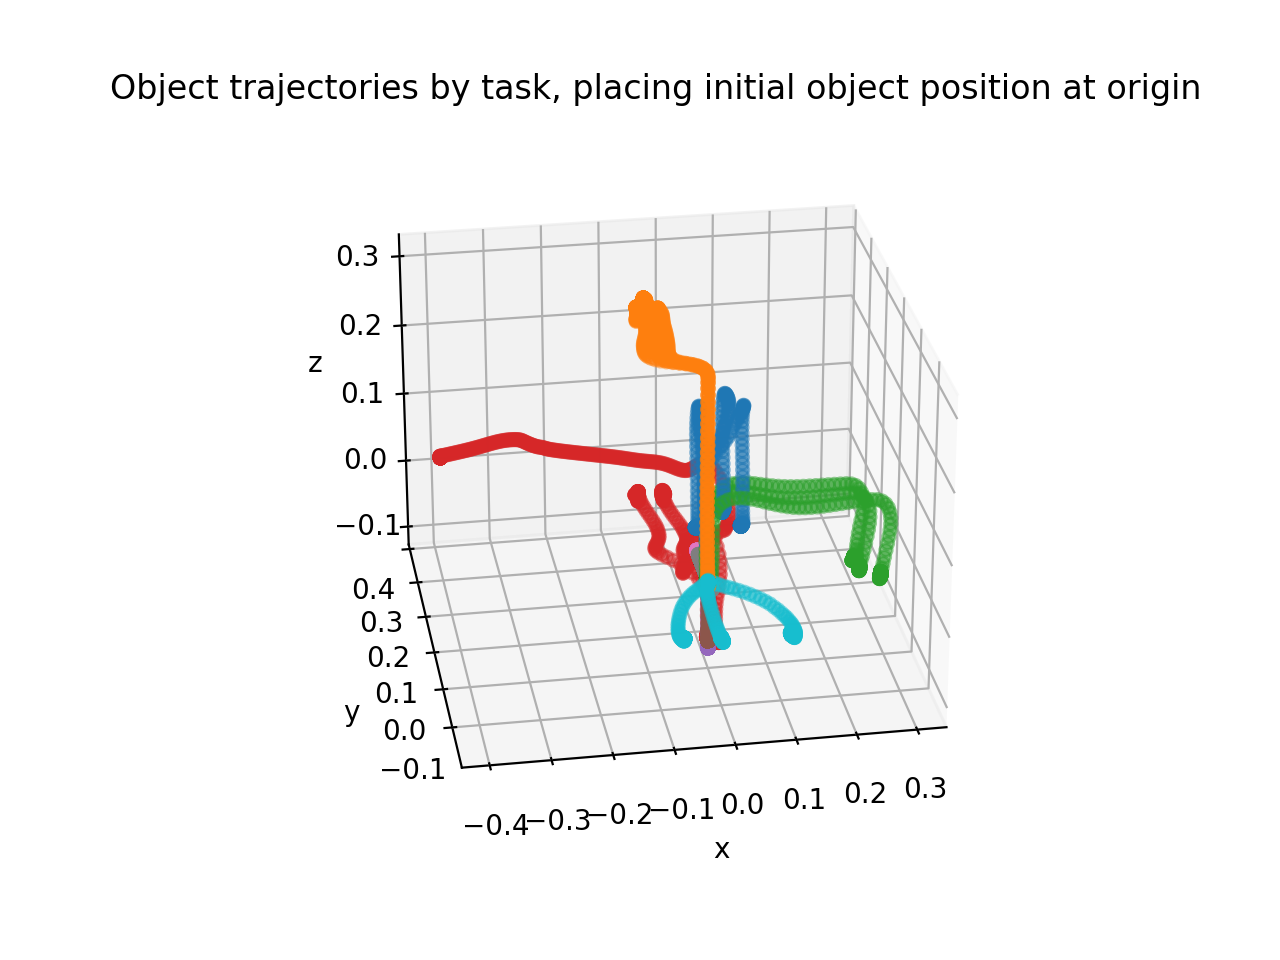

Text(0.5, 0.92, 'Object trajectories by task, placing initial object position at origin')

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i in range(len(all_trajs)):
    trajs = all_trajs[i]
    for traj in trajs:
        traj_plot = traj - traj[0,:] # subtract off the first timestep
        ax.scatter(traj_plot[:,4], traj_plot[:,5], traj_plot[:,6], c=colors[i], alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title('Object trajectories by task, placing initial object position at origin')

<IPython.core.display.Javascript object>


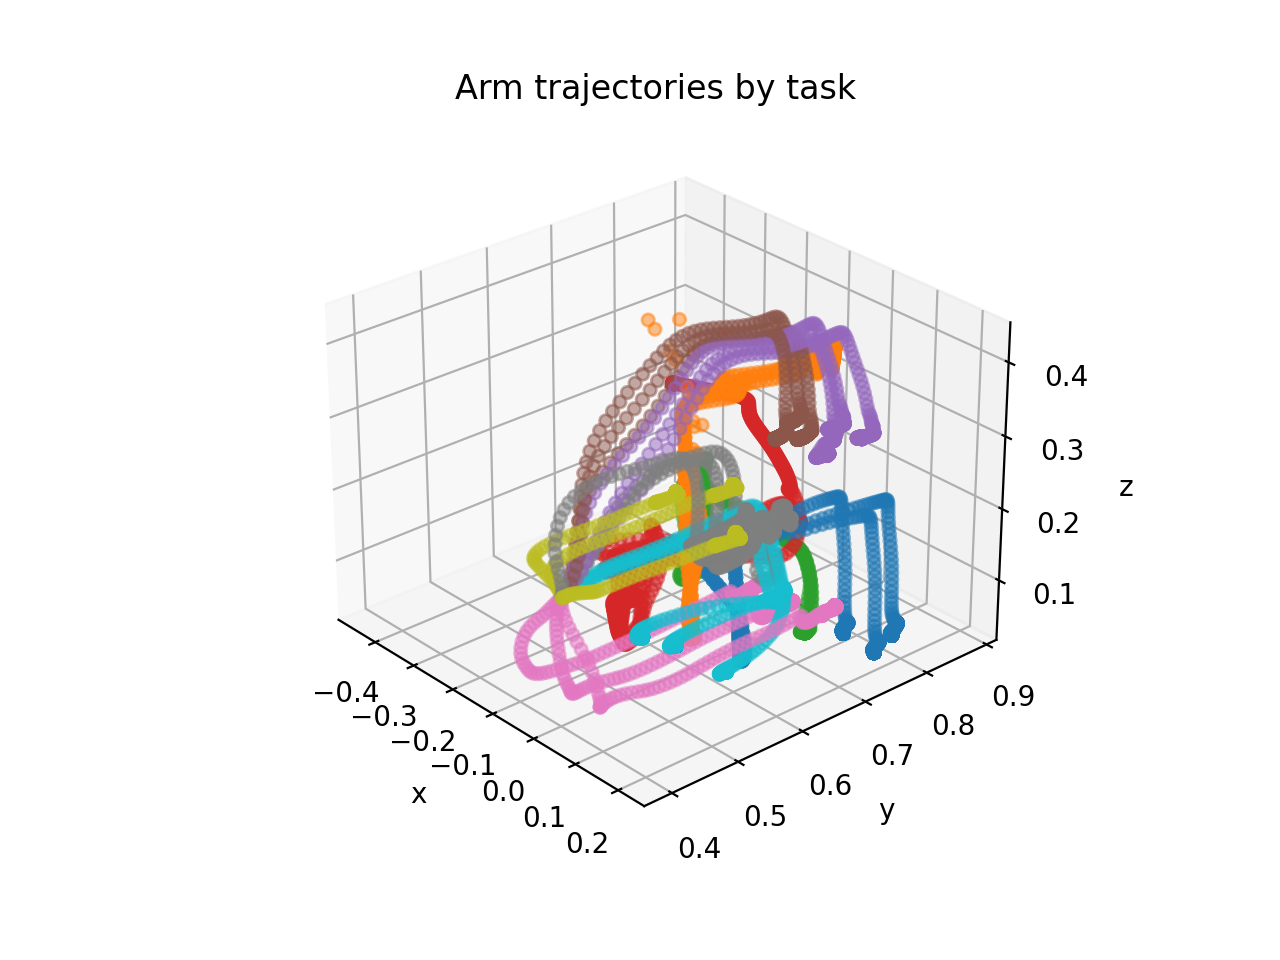

Text(0.5, 0.92, 'Arm trajectories by task')

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i in range(len(all_trajs)):
    trajs = all_trajs[i]
    for traj in trajs:
        ax.scatter(traj[:,0], traj[:,1], traj[:,2], c=colors[i], alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title('Arm trajectories by task')


<IPython.core.display.Javascript object>


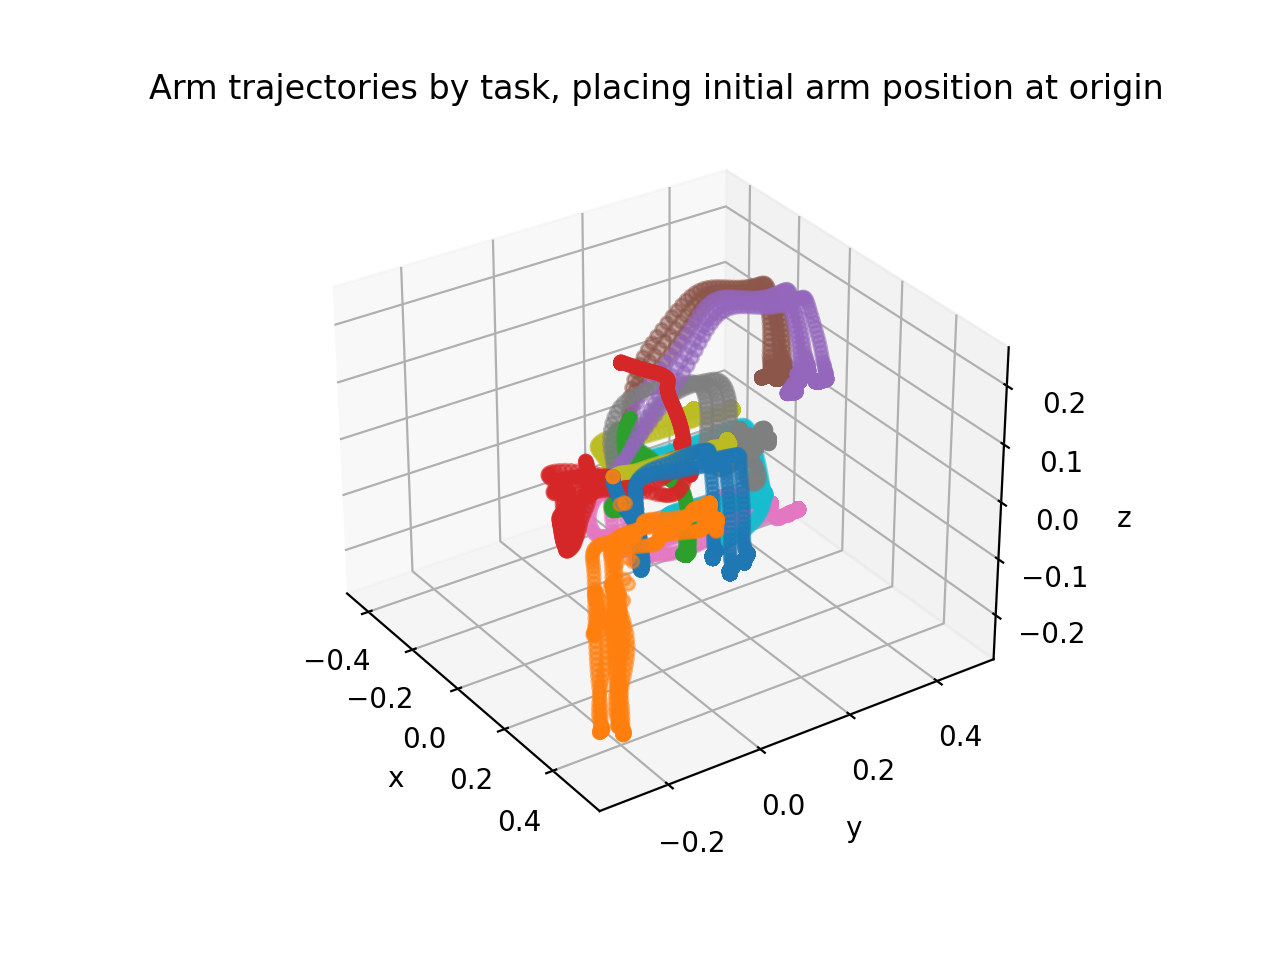

Text(0.5, 0.92, 'Arm trajectories by task, placing initial arm position at origin')

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i in range(len(all_trajs)):
    trajs = all_trajs[i]
    for traj in trajs:
        traj_plot = traj - traj[0,:] # subtract off the first timestep
        ax.scatter(traj_plot[:,0], traj_plot[:,1], traj_plot[:,2], c=colors[i], alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title('Arm trajectories by task, placing initial arm position at origin')

In [ ]:
resolution = (1920, 1080)
camera = 'behindGripper' # one of ['corner', 'topview', 'behindGripper', 'gripperPOV']
flip=True # if True, flips output image 180 degrees

config = [
    # env, action noise pct, cycles, quit on success
    ('assembly-v2', np.zeros(4), 3, True),
    ('basketball-v2', np.zeros(4), 3, True),
    ('bin-picking-v2', np.zeros(4), 3, True),
    ('box-close-v2', np.zeros(4), 3, True),
    ('button-press-topdown-v2', np.zeros(4), 3, True),
    ('button-press-topdown-wall-v2', np.zeros(4), 3, True),
    ('button-press-v2', np.zeros(4), 3, True),
    ('button-press-wall-v2', np.zeros(4), 3, True),
    ('coffee-button-v2', np.zeros(4), 3, True),
    ('coffee-pull-v2', np.zeros(4), 3, True),
    ('coffee-push-v2', np.zeros(4), 3, True),
    ('dial-turn-v2', np.zeros(4), 3, True),
    ('disassemble-v2', np.zeros(4), 3, True),
    ('door-close-v2', np.zeros(4), 3, True),
    ('door-lock-v2', np.zeros(4), 3, True),
    ('door-open-v2', np.zeros(4), 3, True),
    ('door-unlock-v2', np.zeros(4), 3, True),
    ('hand-insert-v2', np.zeros(4), 3, True),
    ('drawer-close-v2', np.zeros(4), 3, True),
    ('drawer-open-v2', np.zeros(4), 3, True),
    ('faucet-open-v2', np.zeros(4), 3, True),
    ('faucet-close-v2', np.zeros(4), 3, True),
    ('hammer-v2', np.zeros(4), 3, True),
    ('handle-press-side-v2', np.zeros(4), 3, True),
    ('handle-press-v2', np.zeros(4), 3, True),
    ('handle-pull-side-v2', np.zeros(4), 3, True),
    ('handle-pull-v2', np.zeros(4), 3, True),
    ('lever-pull-v2', np.zeros(4), 3, True),
    ('peg-insert-side-v2', np.zeros(4), 3, True),
    ('pick-place-wall-v2', np.zeros(4), 3, True),
    ('pick-out-of-hole-v2', np.zeros(4), 3, True),
    ('reach-v2', np.zeros(4), 3, True),
    ('push-back-v2', np.zeros(4), 3, True),
    ('push-v2', np.zeros(4), 3, True),
    ('pick-place-v2', np.zeros(4), 3, True),
    ('plate-slide-v2', np.zeros(4), 3, True),
    ('plate-slide-side-v2', np.zeros(4), 3, True),
    ('plate-slide-back-v2', np.zeros(4), 3, True),
    ('plate-slide-back-side-v2', np.zeros(4), 3, True),
    ('peg-insert-side-v2', np.zeros(4), 3, True),
    ('peg-unplug-side-v2', np.zeros(4), 3, True),
    ('soccer-v2', np.zeros(4), 3, True),
    ('stick-push-v2', np.zeros(4), 3, True),
    ('stick-pull-v2', np.zeros(4), 3, True),
    ('push-wall-v2', np.zeros(4), 3, True),
    ('push-v2', np.zeros(4), 3, True),
    ('reach-wall-v2', np.zeros(4), 3, True),
    ('reach-v2', np.zeros(4), 3, True),
    ('shelf-place-v2', np.zeros(4), 3, True),
    ('sweep-into-v2', np.zeros(4), 3, True),
    ('sweep-v2', np.zeros(4), 3, True),
    ('window-open-v2', np.zeros(4), 3, True),
    ('window-close-v2', np.zeros(4), 3, True),
]

for env, noise, cycles, quit_on_success in config:
    tag = env + '-noise-' + np.array2string(noise, precision=2, separator=',', suppress_small=True)

    policy = functools.reduce(lambda a,b : a if a[0] == env else b, test_cases_latest_nonoise)[1]
    env = ALL_ENVS[env]()
    env._partially_observable = False
    env._freeze_rand_vec = False
    env._set_task_called = True

    writer = writer_for(tag, env.metadata['video.frames_per_second'], resolution)
    for _ in range(cycles):
        for r, done, info, img in trajectory_generator(env, policy, noise, resolution, camera):
            if flip: img = cv2.rotate(img, cv2.ROTATE_180)
            writer.write(img)
            if quit_on_success and info['success']:
                break

    writer.release()